In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmath
import random
import lhsmdu

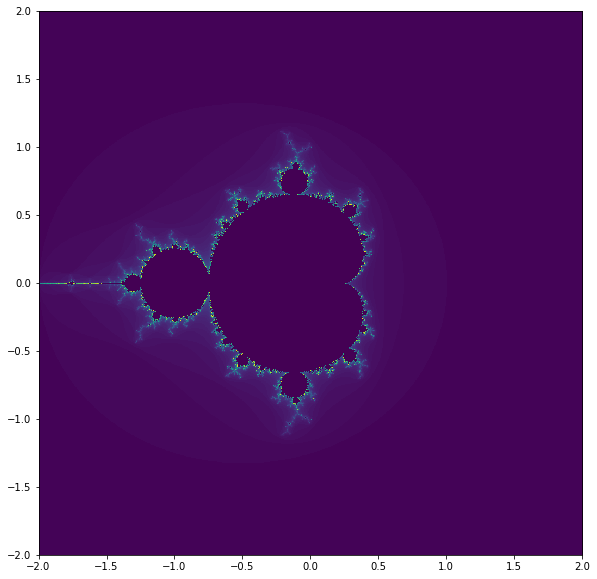

In [3]:
# Initialize the variables for calculating the mandelbrot set
iterations = 100
points = 1000
image = np.zeros((points, points))
x  = np.arange(-2, 2, 4/points)
y  = np.arange(-2, 2, 4/points)

# Iterate over all the points on the imaginary plane
# Save the number of iterations needed to converge to infinity
# When a point does not converge, value remains 0
for i in range(points):
    for j in range(points):
        n_iterations = 0
        z0 = complex(x[i], y[j])
        z = z0
        for k in range(1, iterations):
            z = z*z + z0
            n_iterations +=1
            if abs(z) > 2:
                image[j, i] = n_iterations
                break

fig = plt.subplots(figsize=(10, 10)) # Determine the size of the figure
plt.imshow(image, extent=[-2, 2, -2, 2], interpolation='none')
plt.savefig("figs/Mandelbrot{0}iterations{1}xy.png".format(iterations, len(x)), dpi=300)
plt.show()


In [25]:
# A small function to plot the convergence of the Mandelbrot area approximation
def convergence_plot(Area_list):
    convergence_list = []
    #for each run, calculate the mean of the output from all previous runs
    for i in range(len(Area_list)):
            conv = np.mean(Area_list[0:i])
            convergence_list.append(conv)
    #plot the mean for each number of runs
    x = np.linspace(0, len(Area_list), len(Area_list))
    plt.plot(x, convergence_list)
    plt.show()

In [24]:
#simple montecarlo with random sampling

#Initialize used variables
points = 1000
Area_total = []
runs = 1000
samples = 10000

for i in range(runs):
    #initialize the amount of points that are in the mandelbrot set at the start of each run
    In_mandelbrot = 0
    for i in range(samples):
        #Create a random point from range [0, points-1) for use in the representation of the mandelbrot set
        point = np.random.randint(0, points-1, 2)
        value = image[point[0], point[1]]
        if value != 1:
            In_mandelbrot += 1
    #Calculate the area by taking the average amount of points in the mandelbrot set multiplied by 16.
    #The 16 is to take the total possible area of the range of the mandlebrot set. [-2, 2) in both axis
    Area = 16*(1/samples)*In_mandelbrot
    Area_total.append(Area)

Result =  np.mean(Area_total)
print(Result)

6.2708496


C:\Users\keuni\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\keuni\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


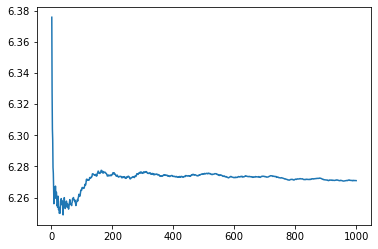

In [26]:
convergence_plot(Area_total)

In [38]:
#An approximation for the Area of the mandelbrot set using latin hypercube sampling

#Initialize the used variables.
scale = 4/Samples
innit = 0
RUNS = 10000
In_mandelbrot = 0
Samples = 1000
Area_total = []
points = 1000

#Create the Latin hypercube with the lhsdmu library
sample_points = lhsmdu.sample(2, points)*points

for k in range(RUNS):
    #initialize the amount of points that are in the mandelbrot set at the start of each run
    In_mandelbrot = 0
    for i in range(Samples):
        #Get random points in the range [-2, 2) for x and y 
        #and check if they are inside the boundaries of the mandelbrot set
        x = round(sample_points[0, i])
        y = round(sample_points[1, i])
        value = image[int(x-1), int(y-1)]
        if value != 1:
            In_mandelbrot += 1
    #Calculate the area by taking the average amount of points in the mandelbrot set multiplied by 16.
    #The 16 is to take the total possible area of the range of the mandlebrot set. [-2, 2) in both axis
    Area = 16*(1/points) * In_mandelbrot
    Area_total.append(Area)
    
Result =  np.mean(Area_total)
print(Result)

6.192000000000001


C:\Users\keuni\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\keuni\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


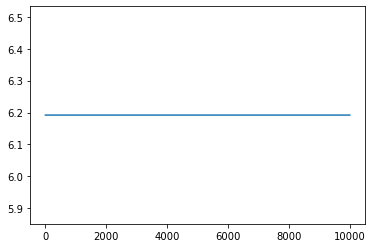

In [39]:
convergence_plot(Area_total)

In [ ]:
#Initialize the used variables.
points = 1000
Samples = points*points
scale = 4/Samples
innit = 0
RUNS = 1000
Area_total = []

#Create two empty matrices of size Points*Points
Orthogonol_x = np.zeros((points, points))
Orthogonol_y = np.zeros((points, points))

#Initialise the empty matrices as Latin hypercubes
for i in range(points):
    for j in range(points):
        innit +=1
        Orthogonol_x[i, j] = innit
        Orthogonol_y[i, j] = innit

for k in range(RUNS):
    In_mandelbrot = 0
    #permute every subspace within the matrices to create a random hypercube
    for j in range(points):
        random.shuffle(Orthogonol_x[j])
        random.shuffle(Orthogonol_y[j])
    for i in range(points):
        for j in range(points):
            #Get a point from scale -2 to 2 with a random factor
            x = -2 + scale * Orthogonol_x[i, j] * np.random.rand(1)[0]
            y = -2 + scale * Orthogonol_y[j, i] * np.random.rand(1)[0]
            #Normalise the points to the range [0, points) for use in the mandelbrot representation
            if(x < 0):
                x = round(abs((x)/2*(points/2)))
                y = round(abs((y)/2*(points/2)))
            else:
                x = round(abs((x)/2*(points/2)+(points/2)))
                y = round(abs((y)/2*(points/2)+(points/2)))
            value = image[int(x-1), int(y-1)]
            if value != 1:
                In_mandelbrot += 1
    #Calculate the area by taking the average amount of points in the mandelbrot set multiplied by 16.
    #The 16 is to take the total possible area of the range of the mandlebrot set. [-2, 2) in both axis
    Area = 16*(1/(Samples*2)) * In_mandelbrot
    Area_total.append(Area)
Result =  np.mean(Area_total)
print(Result)

In [ ]:
convergence_plot(Area_total)